**Akshat Aggarwal**

**E22CSEU0020**

**Question:-1**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.filters import gabor
from ultralytics import YOLO

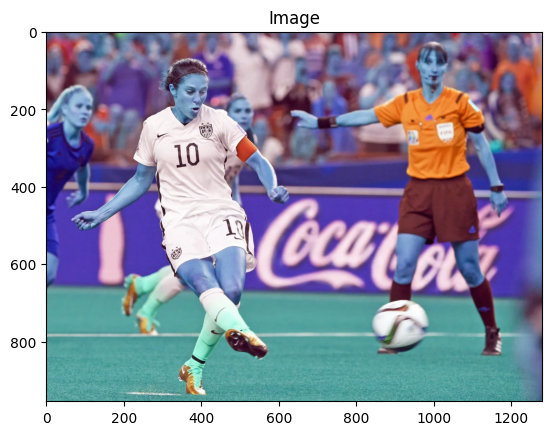

In [3]:
# Task-1: Image Segmentation and Object Identification using Hough Transform
# Load image
i_image = "/content/desk6.jpg"
img = cv2.imread(i_image)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.show()

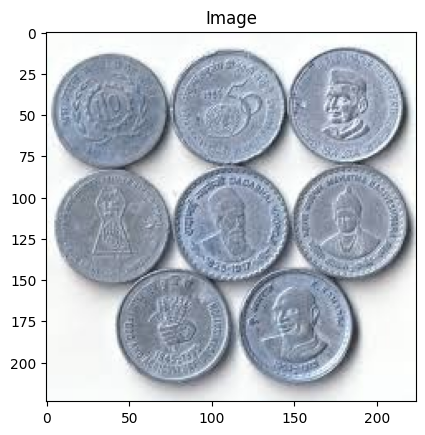

In [4]:
# Load image
i_image = "/content/desk6.2.jpg"
img_1 = cv2.imread(i_image)
plt.imshow(img_1, cmap='gray')
plt.title('Image')
plt.show()

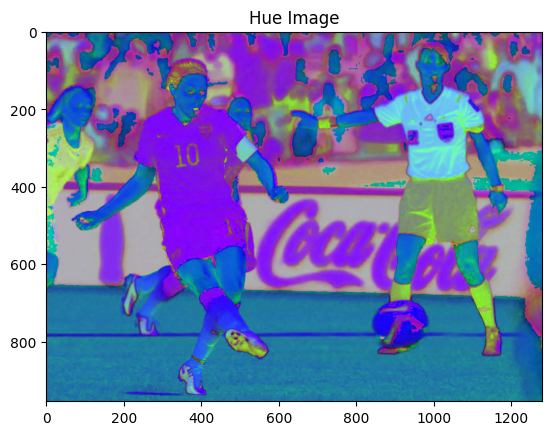

In [5]:
# Convert to HSV before morphological operations
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img, cmap='gray')
plt.title('Hue Image')
plt.show()

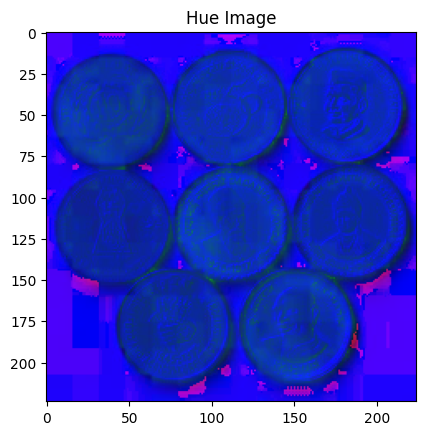

In [6]:
# Convert to HSV before morphological operations
hsv_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img_1, cmap='gray')
plt.title('Hue Image')
plt.show()

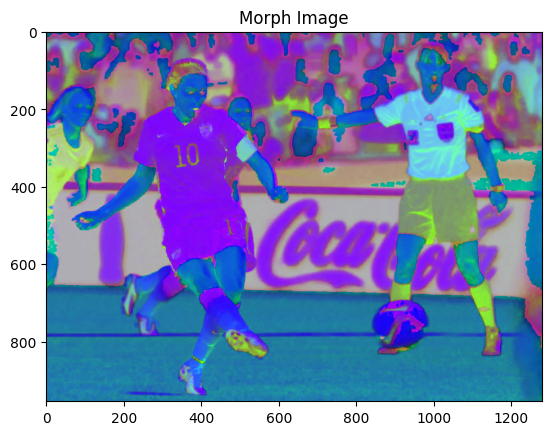

In [7]:
# Apply morphological operations (Closing to remove noise)
kernel = np.ones((5,5), np.uint8)
morph_img = cv2.morphologyEx(hsv_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img, cmap='gray')
plt.title('Morph Image')
plt.show()

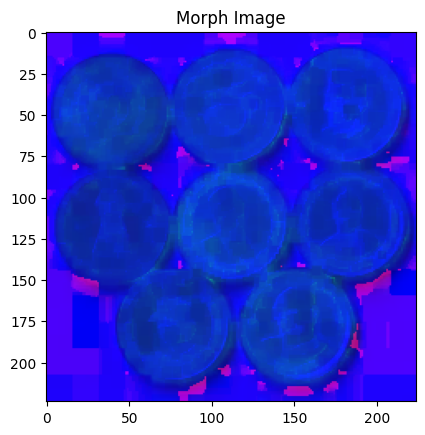

In [8]:
# Apply morphological operations (Closing to remove noise)
kernel = np.ones((5,5), np.uint8)
morph_img_1 = cv2.morphologyEx(hsv_img_1, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph_img_1, cmap='gray')
plt.title('Morph Image')
plt.show()

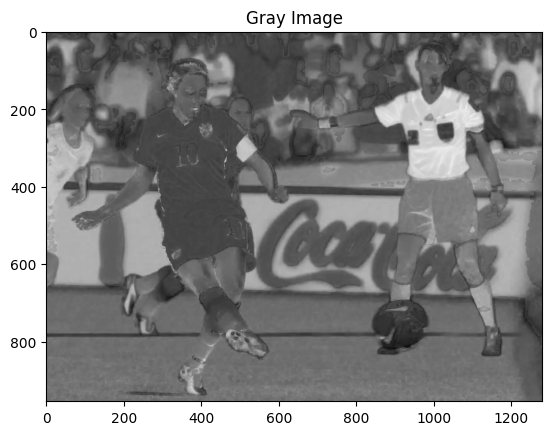

In [9]:
# Convert to grayscale for further processing
gray_img = cv2.cvtColor(morph_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Gray Image')
plt.show()

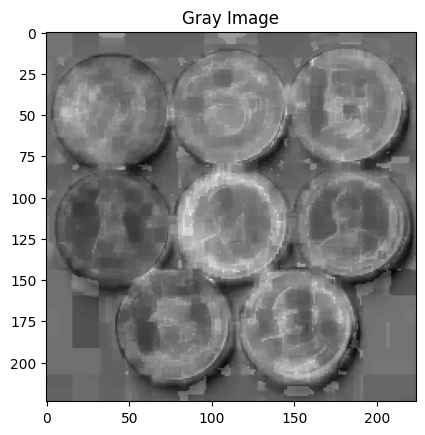

In [10]:
# Convert to grayscale for further processing
gray_img_1 = cv2.cvtColor(morph_img_1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img_1, cmap='gray')
plt.title('Gray Image')
plt.show()

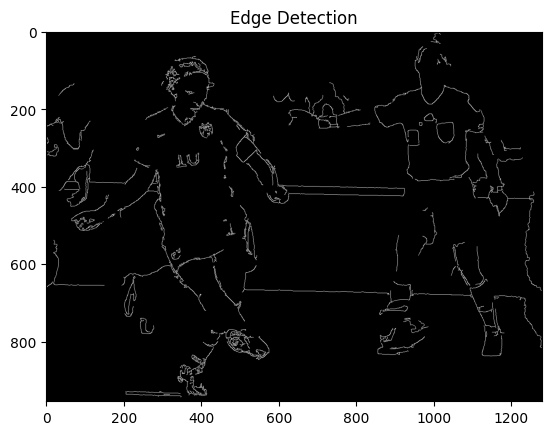

In [11]:
# Apply Edge Detection (Canny)
edges = cv2.Canny(gray_img, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

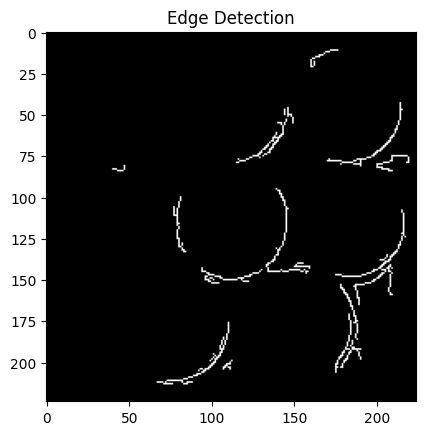

In [12]:
# Apply Edge Detection (Canny)
edges_1 = cv2.Canny(gray_img_1, 50, 150)
plt.imshow(edges_1, cmap='gray')
plt.title('Edge Detection')
plt.show()

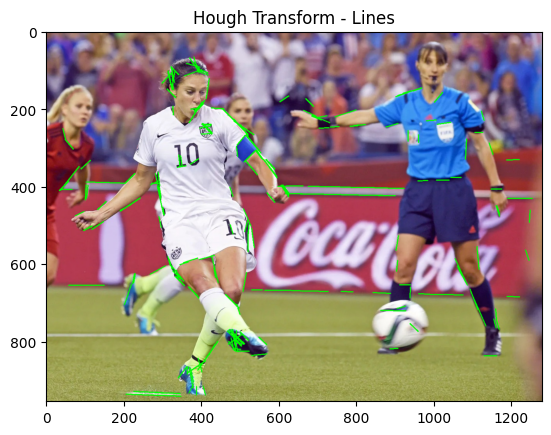

In [13]:
# Hough Transform for Lines
detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Lines')
plt.show()

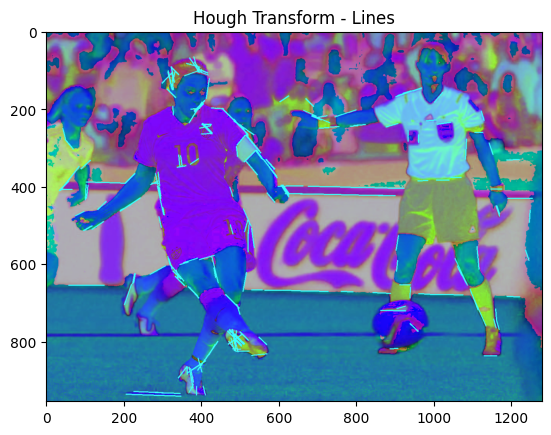

In [14]:
# Hough Transform for Lines
detected_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=20, maxLineGap=10)
if detected_lines is not None:
    for line in detected_lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
plt.title('Hough Transform - Lines')
plt.show()

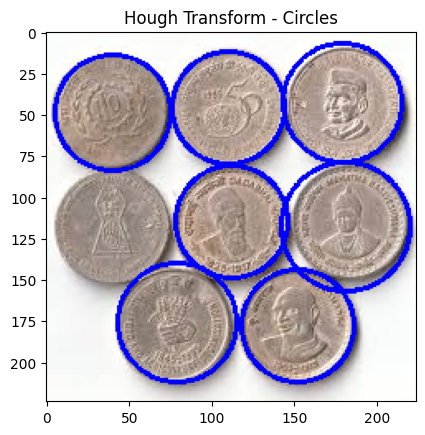

In [15]:
# Hough Transform for Circles
detected_circles = cv2.HoughCircles(gray_img_1, cv2.HOUGH_GRADIENT, dp=1.5, minDist=60, param1=80, param2=35, minRadius=10, maxRadius=60)
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for circle in detected_circles[0, :]:
        cv2.circle(img_1, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform - Circles')
plt.show()

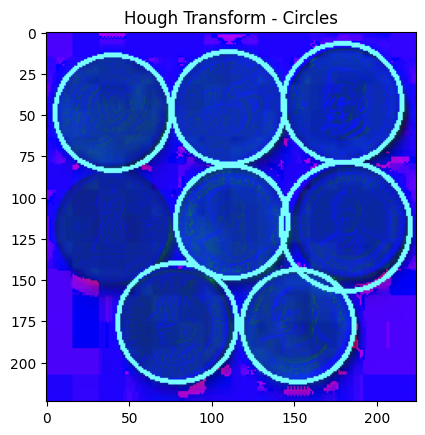

In [16]:
# Hough Transform for Circles
detected_circles = cv2.HoughCircles(gray_img_1, cv2.HOUGH_GRADIENT, dp=1.5, minDist=60, param1=80, param2=35, minRadius=10, maxRadius=60)
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for circle in detected_circles[0, :]:
        cv2.circle(img_1, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV))
plt.title('Hough Transform - Circles')
plt.show()

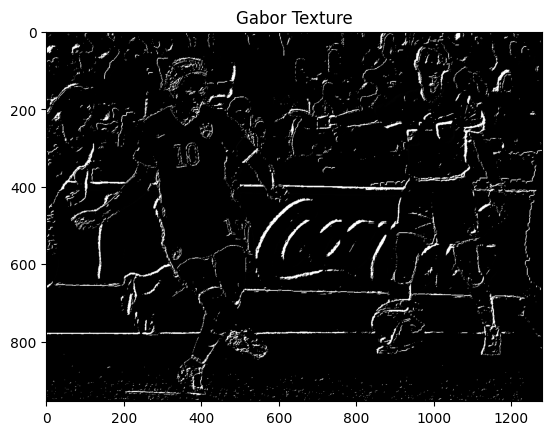

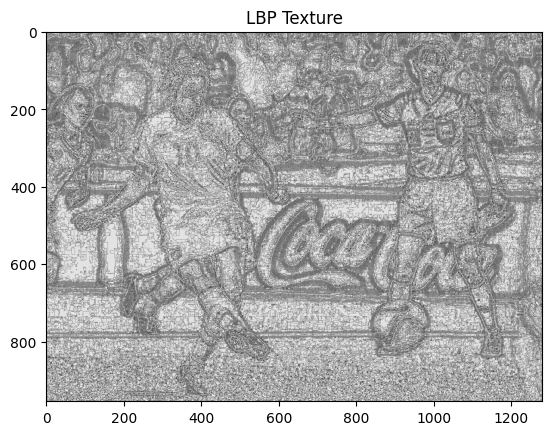

In [17]:
# Texture Feature Extraction (Gabor and LBP)
_, gabor_img = gabor(gray_img, frequency=1.0, theta=0.8)
lbp_img = local_binary_pattern(gray_img, P=8, R=1, method='uniform')

plt.imshow(gabor_img, cmap='gray')
plt.title('Gabor Texture')
plt.show()

plt.imshow(lbp_img, cmap='gray')
plt.title('LBP Texture')
plt.show()

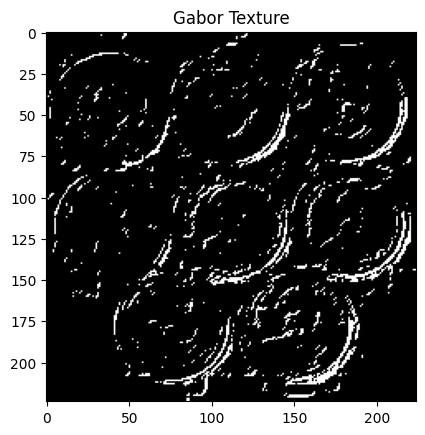

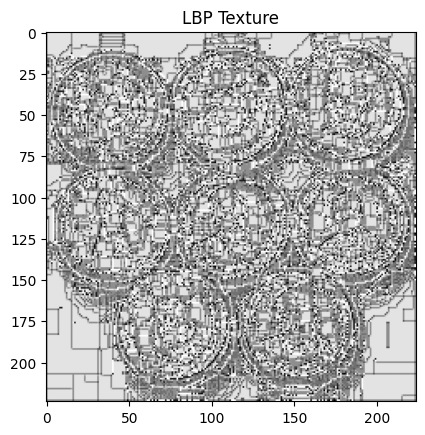

In [18]:
# Texture Feature Extraction (Gabor and LBP)
_, gabor_img_1 = gabor(gray_img_1, frequency=1.0, theta=0.8)
lbp_img_1 = local_binary_pattern(gray_img_1, P=8, R=1, method='uniform')

plt.imshow(gabor_img_1, cmap='gray')
plt.title('Gabor Texture')
plt.show()

plt.imshow(lbp_img_1, cmap='gray')
plt.title('LBP Texture')
plt.show()


In [19]:
# Task-2: Object Detection using YOLO
# Load YOLO Model
yolo = YOLO('yolov8n.pt')

In [20]:
# Perform Object Detection
results = yolo(img)


0: 480x640 11 persons, 1 sports ball, 95.9ms
Speed: 7.3ms preprocess, 95.9ms inference, 704.4ms postprocess per image at shape (1, 3, 480, 640)


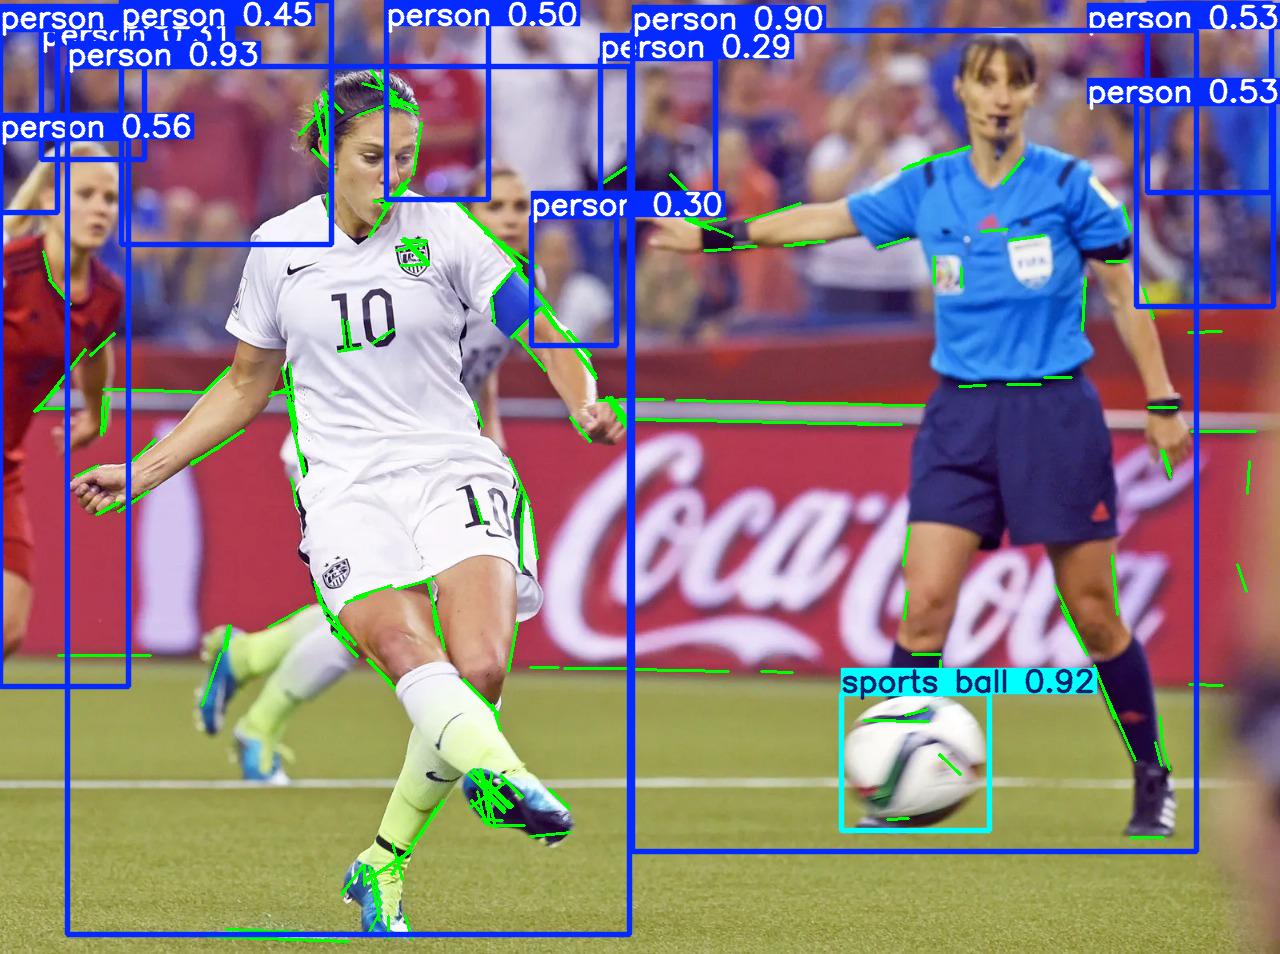

In [21]:
# Display results
results[0].show()

In [22]:
# Task-2.2: Object Detection using RCNN (Simplified Region Proposal)
# Convert image to grayscale for region proposal
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [23]:
# Find contours as regions of interest (ROI)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    roi = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

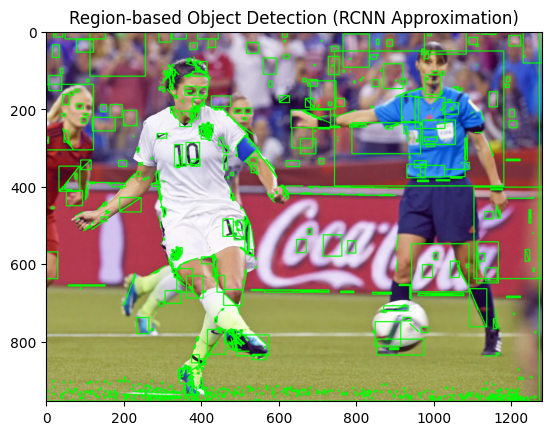

In [24]:
# Show detected objects
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Region-based Object Detection (RCNN Approximation)')
plt.show()